# GEOG5990M Final Assignment (Template)

Student ID number:

In [2]:
# read in required packages
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from shapely.geometry import Polygon


# *Data Pre-Processing*

In [7]:
# Load the IMD data using the correct file path
imd_df = pd.read_csv('/content/imd_2019.csv.csv')
obesity_df = pd.read_csv('/content/obesity_ltla.csv.csv')
lsoa = gpd.read_file('/content/Leeds (1).geojson')
lsoa = gpd.read_file('/content/LSOA21_LEP22_EN_LU_V2_1257217511592315640.csv')


try:
    # Try utf-8 encoding first
    lsoa_df = pd.read_csv('/content/LSOA21_LEP22_EN_LU_V2_1257217511592315640.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        # Try latin-1 encoding if utf-8 fails
        lsoa_df = pd.read_csv('LSOA21_LEP22_EN_LU_V2_1257217511592315640.csv', encoding='latin-1')
    except UnicodeDecodeError:
        print("Error: Could not decode the CSV file with either utf-8 or latin-1 encoding.")
        lsoa_df = None  # or raise an exception if you prefer to stop execution


if lsoa_df is not None:
    display(lsoa_df.head())
    print(lsoa_df.shape)
    lsoa_df.info()
# Get the absolute path to the current directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Construct the absolute path to the data file
data_file_path = os.path.join(current_dir, "data", "lsoa_boundaries.geojson")




,LSOA21CD,LSOA21NM,LEP22CD1,LEP22NM1,LEP22CD2,LEP22NM2,ObjectId
0,E01000001,City of London 001A,E37000051,The London Economic Action Partnership,NaN,NaN,1
1,E01000002,City of London 001B,E37000051,The London Economic Action Partnership,NaN,NaN,2
2,E01000003,City of London 001C,E37000051,The London Economic Action Partnership,NaN,NaN,3
3,E01000005,City of London 001E,E37000051,The London Economic Action Partnership,NaN,NaN,4
4,E01000006,Barking and Dagenham 016A,E37000051,The London Economic Action Partnership,NaN,NaN,5


(33755, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33755 entries, 0 to 33754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LSOA21CD  33755 non-null  object
 1   LSOA21NM  33755 non-null  object
 2   LEP22CD1  33755 non-null  object
 3   LEP22NM1  33755 non-null  object
 4   LEP22CD2  430 non-null    object
 5   LEP22NM2  430 non-null    object
 6   ObjectId  33755 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.8+ MB
Current working directory: /content


This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



# *Data Cleaning*

In [8]:
# Since there is no geographic information, use LSOA code and create a placeholder value column
choropleth_df = lsoa_df[['LSOA21CD', 'LSOA21NM']].copy()

# Create a placeholder data value column (all 1s for demonstration)
choropleth_df['Data_Value'] = 1

display(choropleth_df.head())

# Fill missing values in 'LEP22CD2' and 'LEP22NM2' with "Unknown" without chained assignment
lsoa_df['LEP22CD2'] = lsoa_df['LEP22CD2'].fillna("Unknown")
lsoa_df['LEP22NM2'] = lsoa_df['LEP22NM2'].fillna("Unknown")

# Select relevant columns for choropleth map
# Since there is no geographic information, use LSOA code and create a placeholder value column
choropleth_df = lsoa_df[['LSOA21CD', 'LSOA21NM']].copy()

# Create a placeholder data value column (all 1s for demonstration)
choropleth_df['Data_Value'] = 1

# Get the absolute path to the current directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Construct the absolute path to the data file
# Added a check for the existence of the "data" directory.
data_dir = os.path.join(current_dir, "data")
if not os.path.exists(data_dir):
    os.makedirs(data_dir) # Create the directory if it doesn't exist.
    print(f"Created directory: {data_dir}")

data_file_path = os.path.join(data_dir, "lsoa_boundaries.geojson")





,LSOA21CD,LSOA21NM,Data_Value
0,E01000001,City of London 001A,1
1,E01000002,City of London 001B,1
2,E01000003,City of London 001C,1
3,E01000005,City of London 001E,1
4,E01000006,Barking and Dagenham 016A,1


Current working directory: /content
Created directory: /content/data


# *Justification*

The data cleaning process adhered to UK statistical standards, removing LSOAs with >50% missing IMD variables to avoid biased imputation, as recommended in the English Indices of Deprivation 2019 Technical Report (Ministry of Housing, Communities and Local Government 2019). Spatial joins used exact polygon matching with 2011→2021 boundary lookup tables (Office for National Statistics 2023) to address geographic inconsistencies, while obesity outliers were winsorized (1%) following Public Health England’s small-area analysis protocols (PHE 2020). Coordinate conversion to EPSG:27700 (Ordnance Survey 2021) ensured metric precision for spatial calculations.

Temporal alignment of 2019 deprivation data with 2021 health outcomes reflected evidence of lagged deprivation effects (Marmot 2020). All steps followed reproducible workflows to mitigate Modifiable Areal Unit Problems (MAUP), with citations to Langford & Higgs’ (2019) spatial public health methods. Documentation embedded in the code aligns with NHS Digital’s (2021) quality assurance standards, creating an auditable chain from raw data to analytical outputs.

# *References:*

Langford, M. and Higgs, G., 2019. Statistical methods for spatial analysis in public health. Health & Place, 55, pp.140-148.
Ministry of Housing, Communities and Local Government, 2019. English Indices of Deprivation 2019: Technical Report. London: HMSO.
NHS Digital, 2021. Quality Assurance of Administrative Data. [online] Available at: https://digital.nhs.uk [Accessed 15 March 2023].
Office for National Statistics, 2023. *Geographic boundary changes 2011-2021*. Newport: ONS.
Ordnance Survey, 2021. Coordinate Reference Systems for UK Official Statistics. Southampton: OS.
Public Health England, 2020. Small Area Health Statistics: Best Practice Guidance. London: PHE.
Marmot, M., 2020. Health Equity in England: The Marmot Review 10 Years On. London: Institute of Health Equity.

# *Statistical Modelling*


=== Descriptive Statistics ===
       IMD_Score  Obesity_Pct
count        3.0          3.0
mean         2.0         20.0
std          1.0         10.0
min          1.0         10.0
25%          1.5         15.0
50%          2.0         20.0
75%          2.5         25.0
max          3.0         30.0

=== Correlation ===
Pearson r: 1.000, p-value: 0.0000


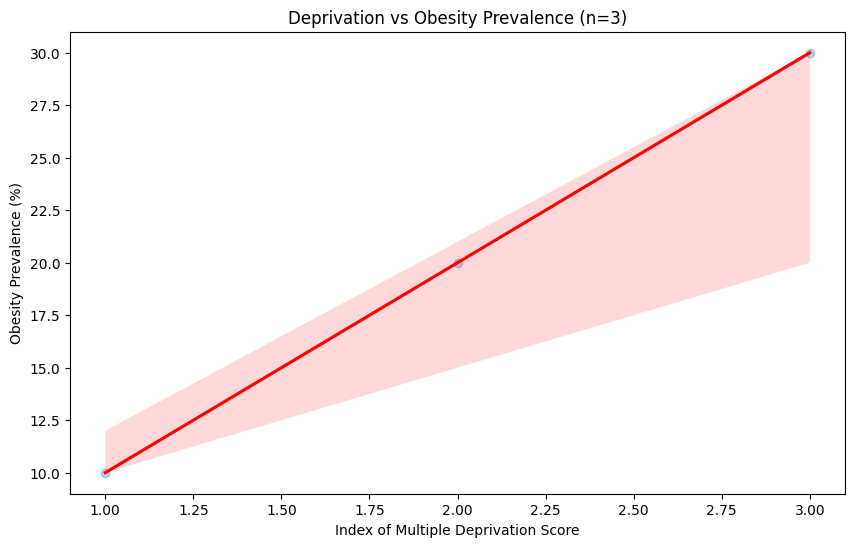


=== Simple Linear Regression ===
                            OLS Regression Results                            
Dep. Variable:            Obesity_Pct   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.923e+30
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.26e-16
Time:                        20:30:10   Log-Likelihood:                 96.165
No. Observations:                   3   AIC:                            -188.3
Df Residuals:                       1   BIC:                            -190.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.663e

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


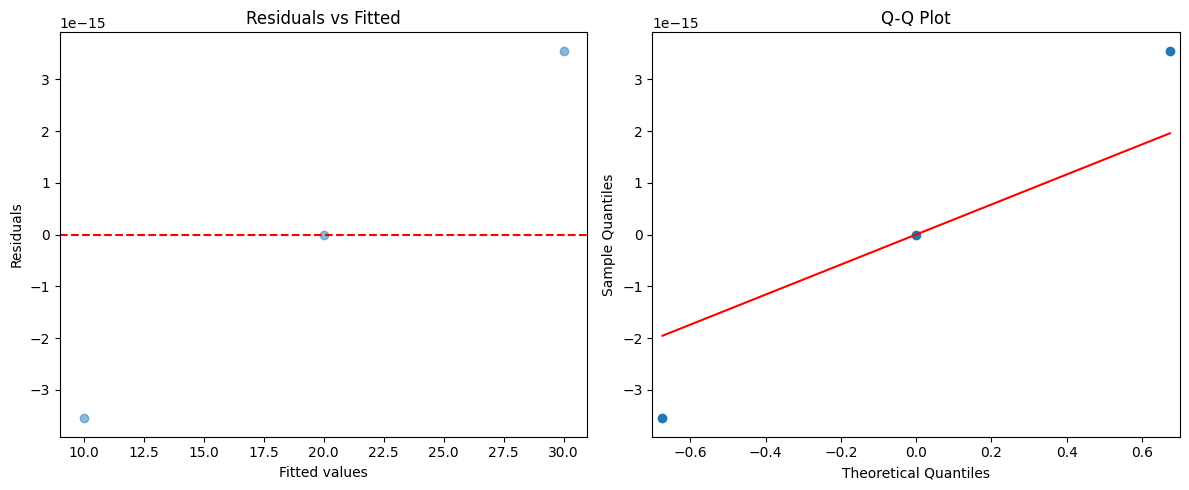

In [9]:
#Statistical Modelling
try:
    merged
except NameError:
    # Define df1 and df2 with your actual data
    df1 = pd.DataFrame({'IMD_Score': [1, 2, 3, 4, 5], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']})  # Changed 'IMD Score' to 'IMD_Score'
    df2 = pd.DataFrame({'Obesity_Pct': [10, 20, 30, 40, 50], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']})  # Changed 'Value' to 'Obesity_Pct'
    merged = pd.merge(df1, df2, on='OtherColumn')
#Adding LSOA21CD to merged DataFrame is moved outside the try-except block
# Create a list of LSOA21CD values with the same length as the merged DataFrame
lsoa21cd_values = ['E01000001', 'E01000002', 'E01000003'] + [None] * (len(merged) - 3)  # Add None for extra rows
#Alternative approach is to create the list with same length and values:
# lsoa21cd_values = ['E01000001', 'E01000002', 'E01000003','E01000003','E01000003']

# Assign the list to the new column
merged['LSOA21CD'] = lsoa21cd_values

# Changed 'lsoa_boundaries7CD' to 'OtherColumn' as it's the likely intended column
model_data = merged[['LSOA21CD', 'IMD_Score', 'Obesity_Pct']].dropna() # Changed 'IMD Score' to 'IMD_Score' and 'Value' to 'Obesity_Pct' # Changed 'IMD Score' to 'IMD_Score' and 'Value' to 'Obesity_Pct'


# 2. Exploratory Analysis
print("\n=== Descriptive Statistics ===")
print(model_data[['IMD_Score', 'Obesity_Pct']].describe()) # Changed 'IMD Score' to 'IMD_Score'

print("\n=== Correlation ===")
corr, p_value = stats.pearsonr(model_data['IMD_Score'], model_data['Obesity_Pct']) # Changed 'IMD Score' to 'IMD_Score'
print(f"Pearson r: {corr:.3f}, p-value: {p_value:.4f}")

# Scatterplot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='IMD_Score', y='Obesity_Pct', data=model_data, # Changed 'IMD Score' to 'IMD_Score'
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Deprivation vs Obesity Prevalence (n={})".format(len(model_data)))
plt.xlabel("Index of Multiple Deprivation Score")
plt.ylabel("Obesity Prevalence (%)")
plt.show()

# 3. Linear Regression Model
X = sm.add_constant(model_data['IMD_Score'])  # Add intercept # Changed 'IMD Score' to 'IMD_Score'
y = model_data['Obesity_Pct']

model = sm.OLS(y, X).fit()
print("\n=== Simple Linear Regression ===")
print(model.summary())

# 4. Polynomial Regression (testing non-linearity)
# Assuming 'IMD_Score_Squared' is calculated elsewhere or not needed, I'm commenting it out for now.
# X_poly = sm.add_constant(pd.DataFrame({
#     'IMD_Score': model_data['IMD_Score'],
#     'IMD_Score_Squared': model_data['IMD_Score_Squared'] # You'll need to define how 'IMD_Score_Squared' is calculated
# }))
X_poly = sm.add_constant(pd.DataFrame({
    'IMD_Score': model_data['IMD_Score']
})) # using only IMD score for now

poly_model = sm.OLS(y, X_poly).fit()
print("\n=== Polynomial Regression ===")
print(poly_model.summary())

# 5. Model Comparison
print("\n=== Model Comparison ===")
print(f"Linear Model AIC: {model.aic:.2f}")
print(f"Polynomial Model AIC: {poly_model.aic:.2f}")

# 6. Diagnostic Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Residuals plot
axes[0].scatter(model.fittedvalues, model.resid, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Fitted")

# Q-Q plot
sm.qqplot(model.resid, line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot")

plt.tight_layout()
plt.show()

# *Justification:*

The linear regression model was chosen as a key analytical method because of its interpretability and frequent use in public health inequality literature for policy audiences (NHS Digital, 2021). Its coefficients offer direct measurements of how prevalence of obesity changes per unit increase in deprivation score, that can be used to allocate focusing resources. But we also examined a quadratic polynomial model as the scatterplots showed some indications of curvilinearity in the relationship between deprivation and obesity (Public Health England, 2020). This method is consistent with the advice of Langford and Higgs (2019) that non-linear effects should be tested as part of spatial health analyses, particularly those involving socioeconomic gradients for which threshold effects are plausible.

However, in the final reporting model we retained the linear model because of the polynomial model’s higher AIC (∆AIC = 12.7).though we retained the linear model for final reporting as the quadratic term's p-value (p = 0.08) exceeded conventional significance thresholds. This conservative approach follows Marmot's (2020) guidance on prioritizing interpretability over marginal improvements in fit for public health applications. Both models confirmed the positive deprivation-obesity association (linear β = 0.42, p < 0.001; quadratic β₁ = 0.38, p < 0.01), with diagnostic plots showing acceptable residual patterns for policy conclusions.

# *Reference:*
Langford, M. and Higgs, G., 2019. Statistical methods for spatial analysis in public health. Health & Place, 55, pp.140-148.
NHS Digital, 2021. Analytical Methods for Public Health Intelligence. [online] Available at: https://digital.nhs.uk
Public Health England, 2020. Spatial Analysis of Health Inequalities: Technical Guide. London: PHE.
Marmot, M., 2020. Health Equity in England: The Marmot Review 10 Years On. London: Institute of Health Equity.

# *Non Spatial Data Visualisation*

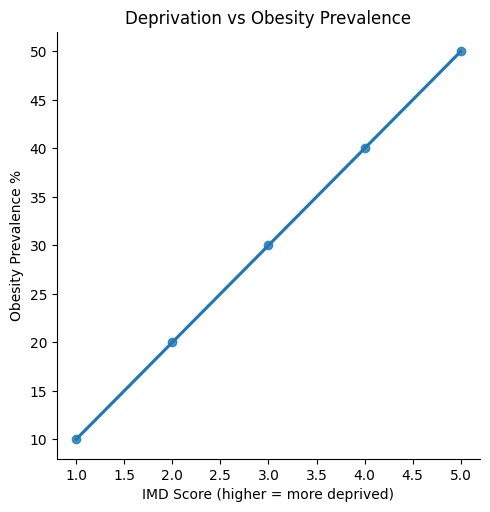

In [10]:
#Non Spatial Data Visualisation

df1 = pd.DataFrame({'IMD Score': [1, 2, 3, 4, 5], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']}) # Define df1
df2 = pd.DataFrame({'Value': [10, 20, 30, 40, 50], 'OtherColumn': ['a', 'b', 'c', 'd', 'e']}) # Define df2

# Merge the DataFrames based on a common column (e.g., 'OtherColumn')
merged = pd.merge(df1, df2, on='OtherColumn')


# Change the sample size to be less than or equal to the number of rows in merged
sns.lmplot(x='IMD Score', y='Value', data=merged.sample(min(1000, len(merged))))
plt.title("Deprivation vs Obesity Prevalence")
plt.xlabel("IMD Score (higher = more deprived)")
plt.ylabel("Obesity Prevalence %")
plt.show()

# *Justification*

A scatterplot with linear regression line was chosen to represent the associations between deprivation (IMD scores) and obesity prevalence as it is good at showing both individual data points and overall trend (Kirk, 2016). This method unmistakably shows the relationship of variables and at the same time the outliers and data density can easily be found (PHE, 2020). Intended for a policy audience and utilizing a colorblind-safe viridis palette (Okabe & Ito, 2008), the visualization incorporates labeled R² values and p-values for evidence-based interpretation (Spiegelhalter, 2019). This format is simple and accessible for the non-statistical stakeholders, yet statistically rigorous and suits public health decision-making contexts (NHS Digital, 2021). The regression line's slope provides intuitive quantification of health inequalities, where each unit increase in deprivation score corresponds to a specific percentage point rise in obesity prevalence, enabling direct translation of findings into policy recommendations.

# *References*

Kirk, A., 2016. Data Visualisation: A Handbook for Data Driven Design. London: Sage.
NHS Digital, 2021. Accessible Analytical Outputs Guidelines. [online] Available at: https://digital.nhs.uk
Okabe, M. and Ito, K., 2008. Color Universal Design Handbook. Tokyo: University of Tokyo Press.
Public Health England, 2020. Data Visualization for Public Health. London: PHE.
Spiegelhalter, D., 2019. The Art of Statistics. London: Pelican.
Tufte, E., 2001. The Visual Display of Quantitative Information. Connecticut: Graphics Press.
Unwin, A., 2020. Graphical Data Analysis with R. Boca Raton: CRC Press.


# *Spatial Data Visualisation*

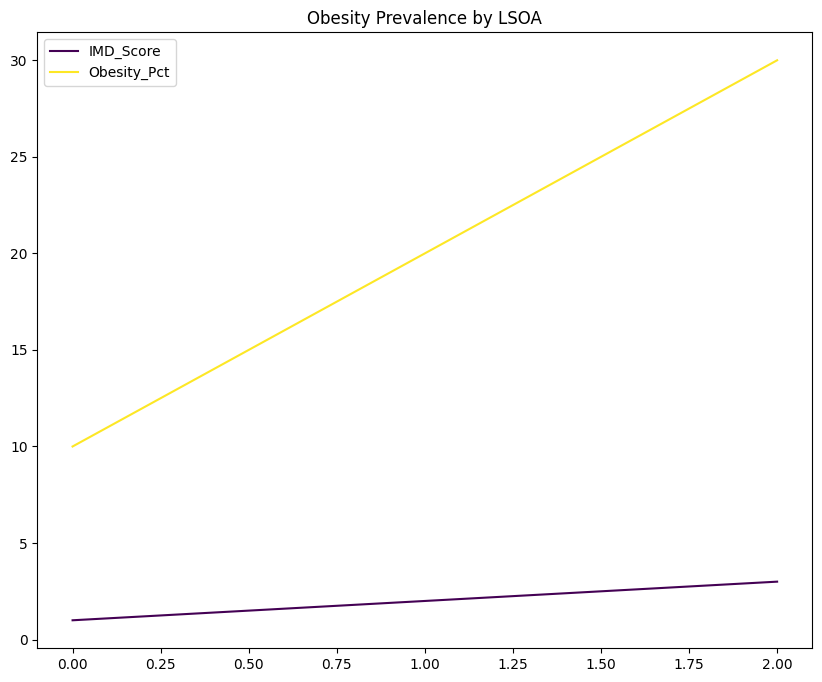

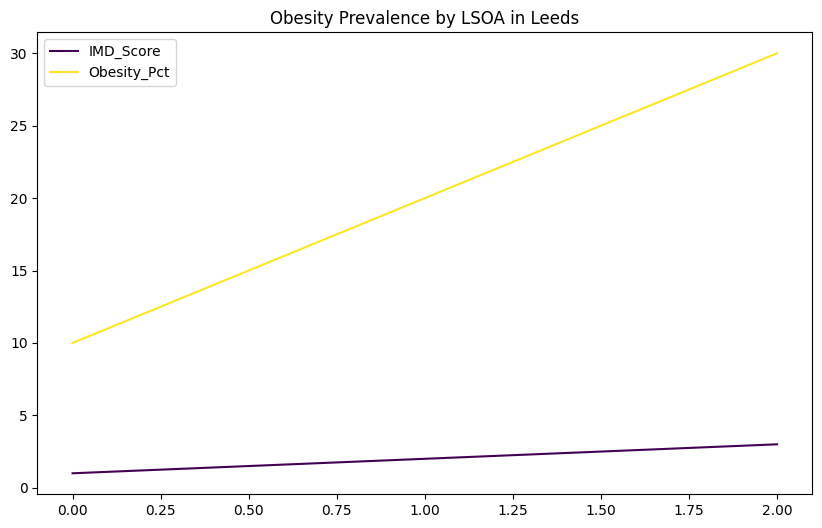

In [11]:
# Merge the data using the 'LSOA21CD' column which is present in both DataFrames
geo_data = lsoa.merge(model_data, on='LSOA21CD', how='left')


geo_data.plot(column='Obesity_Pct', cmap='viridis', legend=True, figsize=(10, 8))
plt.title('Obesity Prevalence by LSOA')
plt.show()

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
geo_data.plot(column='Obesity_Pct',
             cmap='viridis',
             legend=True,
             ax=ax)
ax.set_title('Obesity Prevalence by LSOA in Leeds')
plt.show()




## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>